# Multiple Linear Regression
## Test Scores Case Study

#### Problem Statement:

Consider the `test_scores` dataset containing the scores of students from some paticular region. Using this dataset we are predicting the `postest` scores based on important factors such as pretest, school_type, teaching method, etc.


**The steps are:**
1. Reading,Understanding the data
2. Exploratory data analysis i.e visualizing the data
3. Preparing the data for modelling(train-test split)
4. Training the model
5. Predictions and Evaluation on the test set

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#to split data
import sklearn 
from sklearn.model_selection import train_test_split

#linear regression model
from sklearn.linear_model import LinearRegression

## Step1 : Reading and Understanding data

In [2]:
#read the csv file and view some sample records
data = pd.read_csv('test_scores.csv')
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [4]:
#no. of unique records in each column
data.nunique()

school               23
school_setting        3
school_type           2
classroom            97
teaching_method       2
n_student            18
student_id         2133
gender                2
lunch                 2
pretest              69
posttest             68
dtype: int64

In [5]:
data['school_setting'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
data['school_type'].unique()

array(['Non-public', 'Public'], dtype=object)

In [7]:
#checking for duplicates
data.duplicated().sum()

0

In [8]:
#checking for missing values
data.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

## Step 2: Exploratory Data Analysis 

#### Visualising categorical variables

<AxesSubplot:xlabel='lunch', ylabel='posttest'>

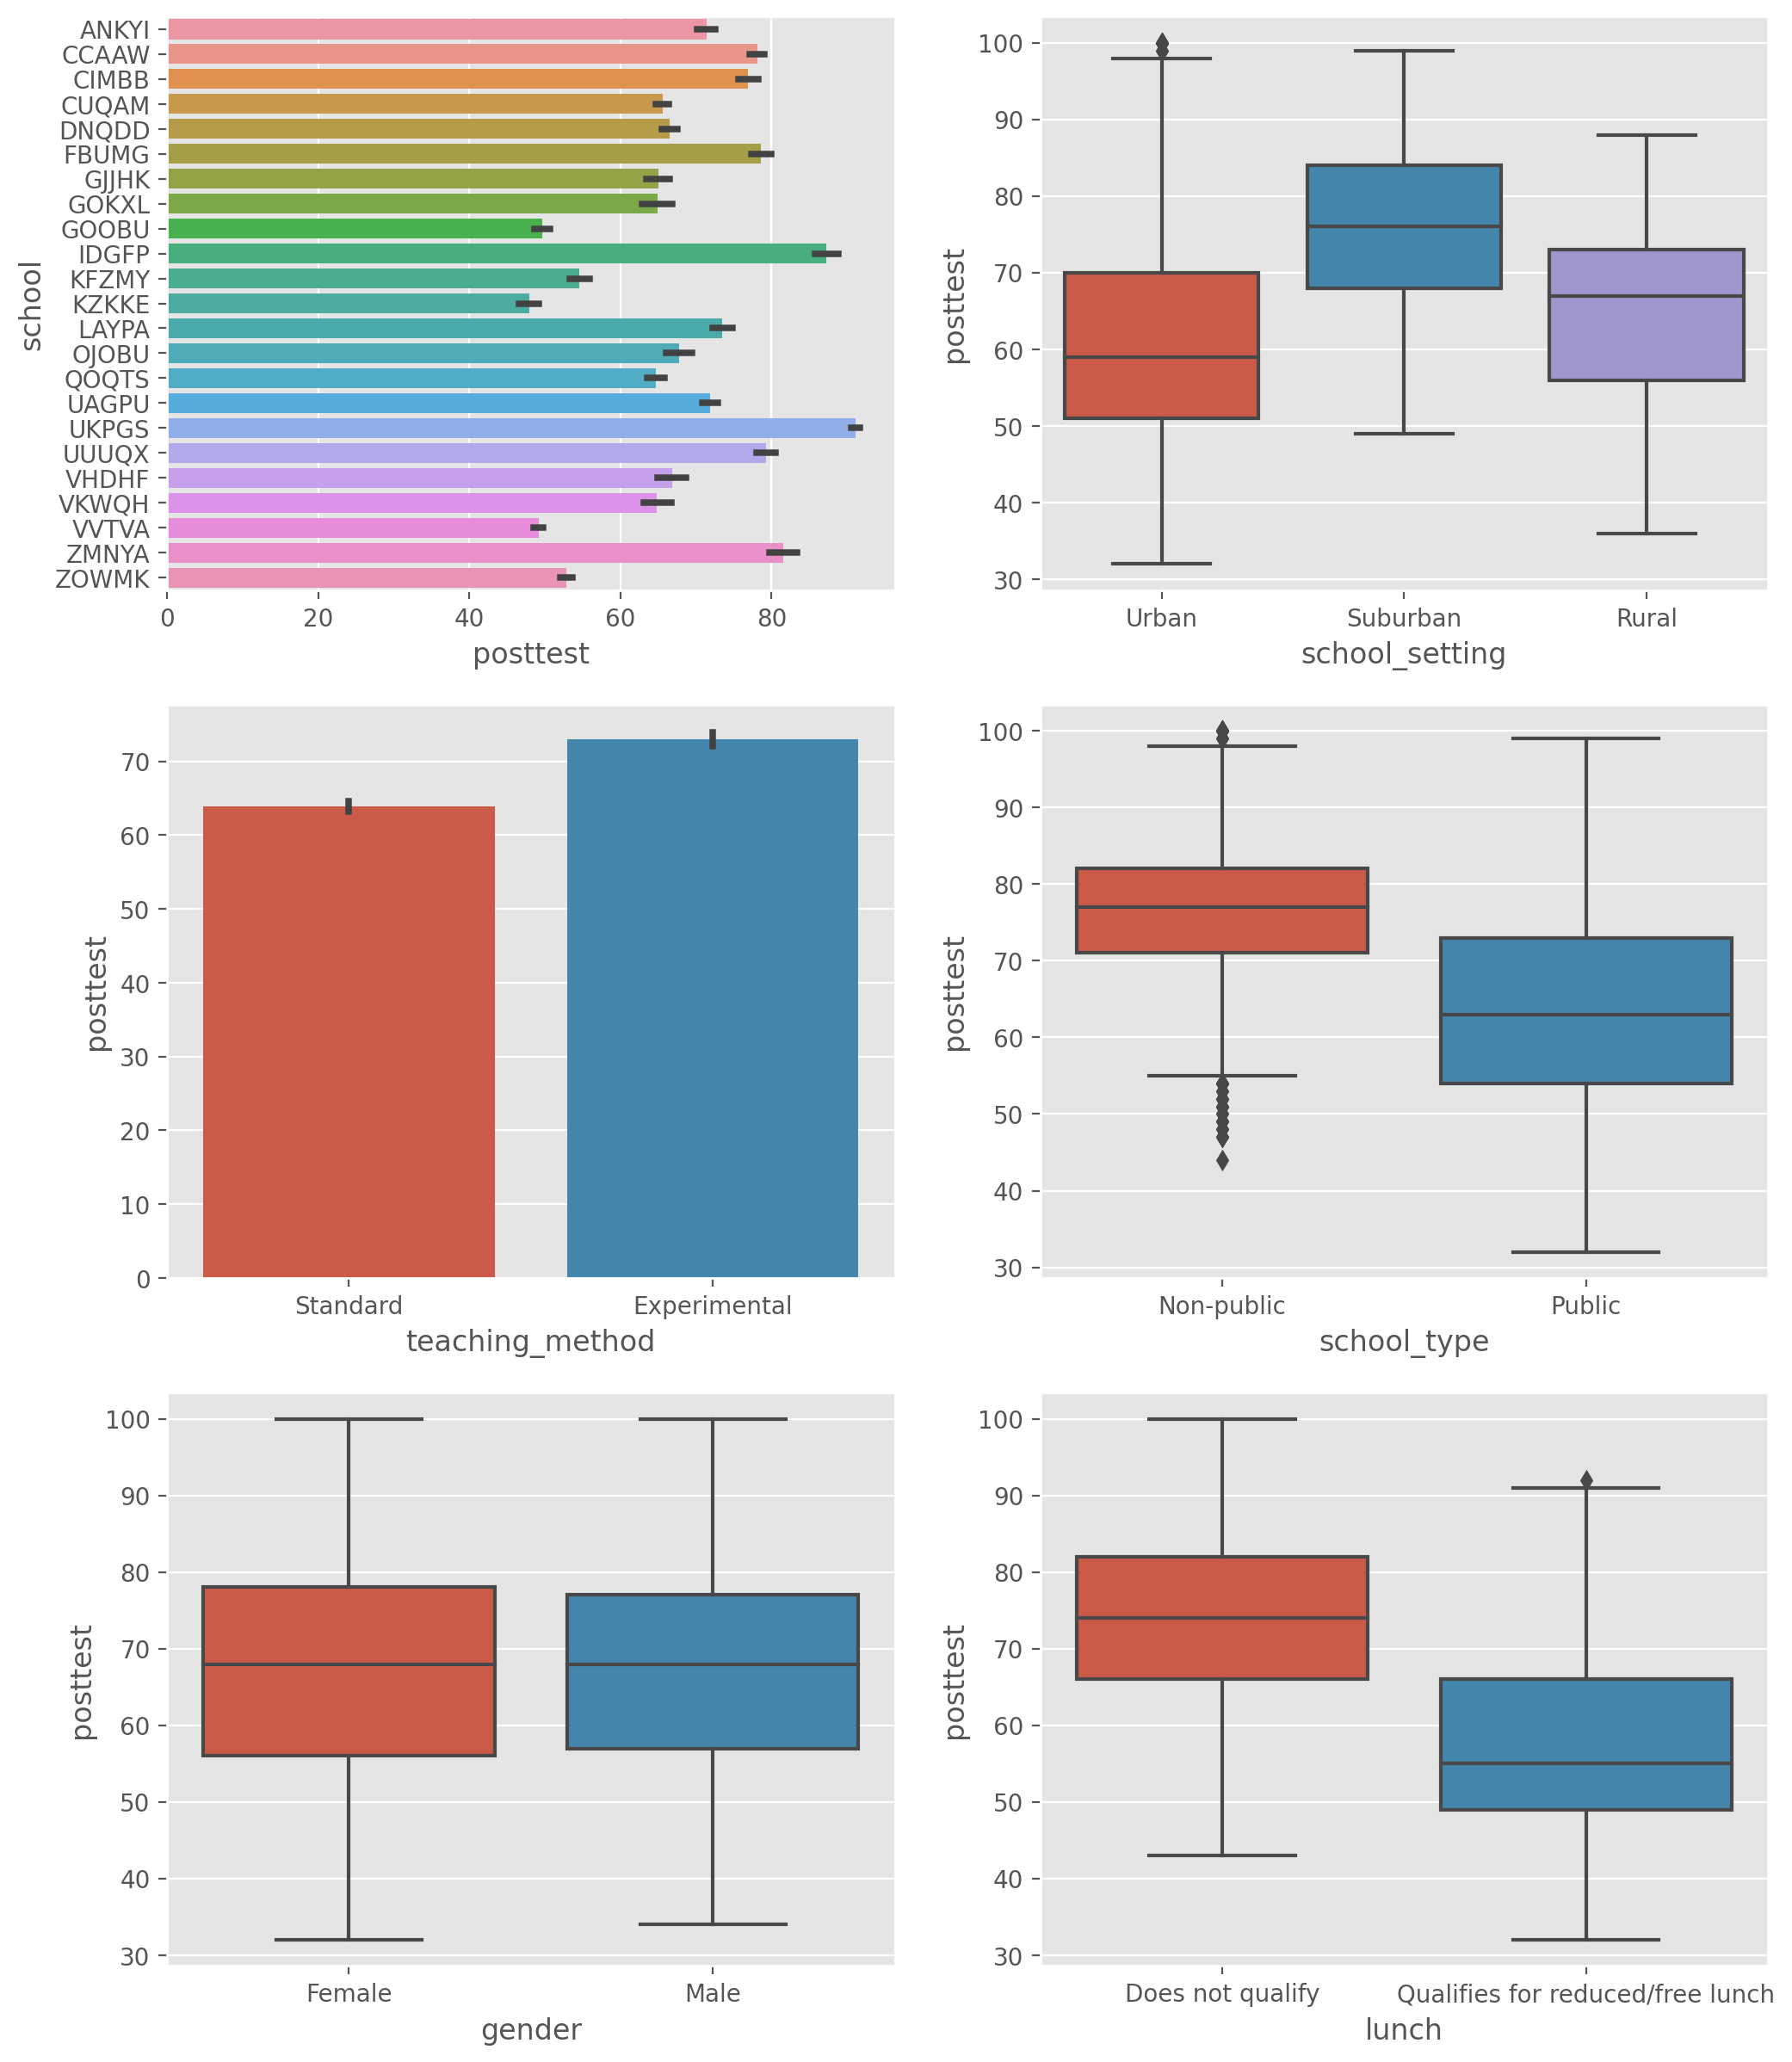

In [9]:
plt.figure(figsize = (12,15), dpi = 200)

plt.subplot(3,2,1)
sns.barplot(x='posttest',y='school',data=data)

plt.subplot(3,2,2)
sns.boxplot(x='school_setting',y='posttest',data=data)

plt.subplot(3,2,3)
sns.barplot(x='teaching_method',y='posttest',data=data)

plt.subplot(3,2,4)
sns.boxplot(x='school_type',y='posttest',data=data)

plt.subplot(3,2,5)
sns.boxplot(x='gender',y='posttest',data=data)

plt.subplot(3,2,6)
sns.boxplot(x='lunch',y='posttest',data=data)


#### Visualising numerical variable

<AxesSubplot:xlabel='pretest', ylabel='posttest'>

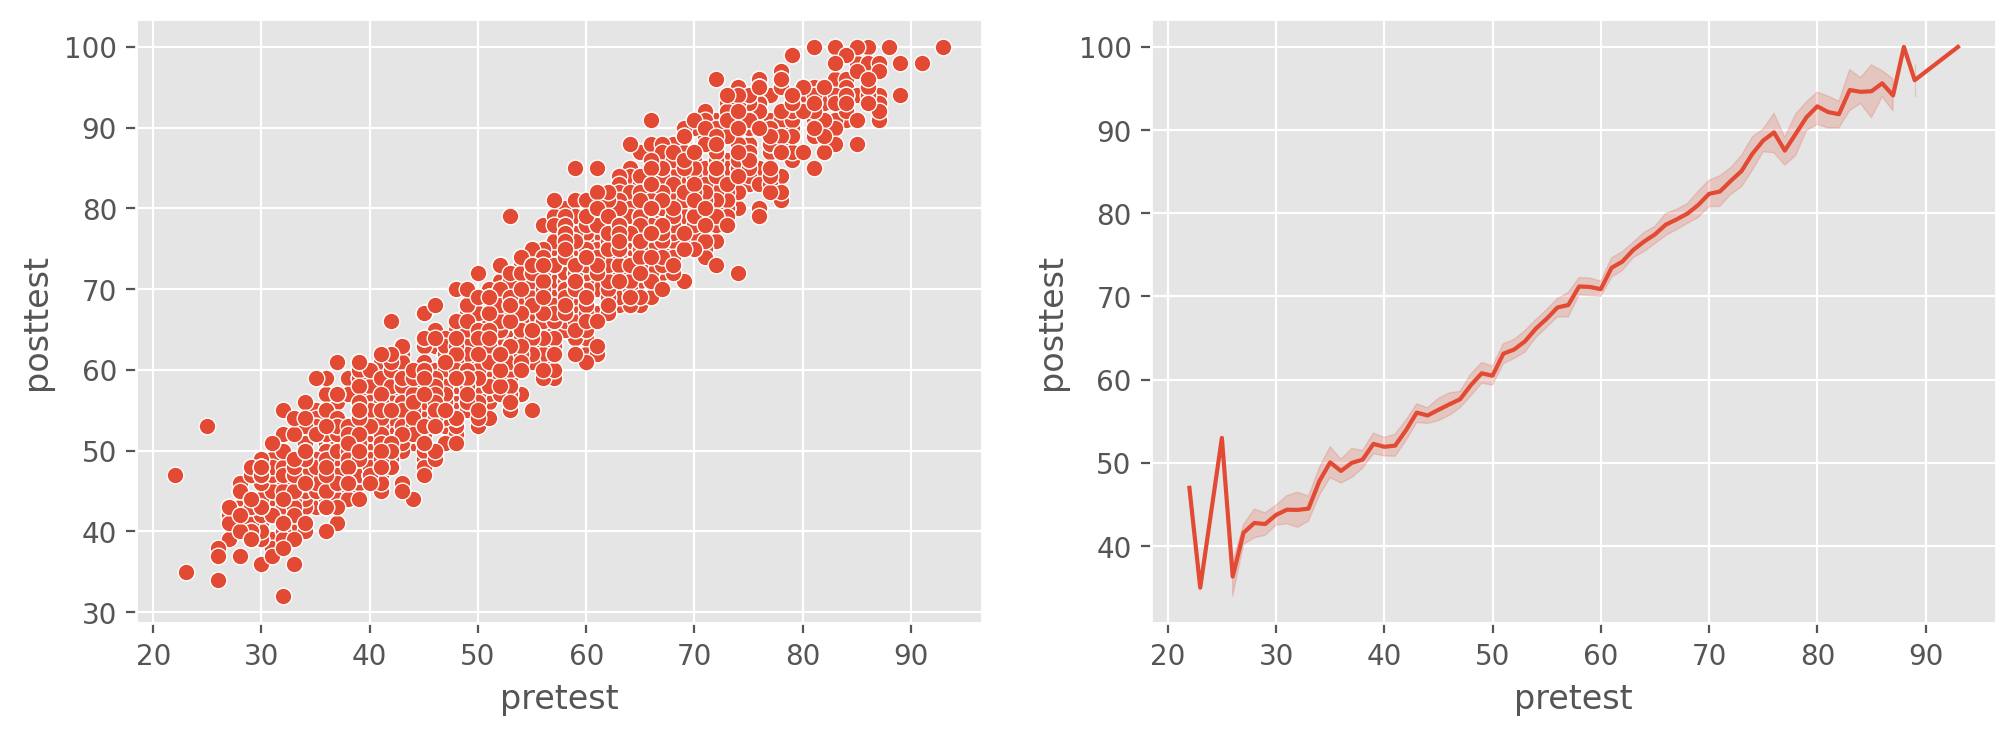

In [10]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.scatterplot(x='pretest',y='posttest',data=data)

plt.subplot(1,2,2)
sns.lineplot(x='pretest',y='posttest',data=data)

<AxesSubplot:>

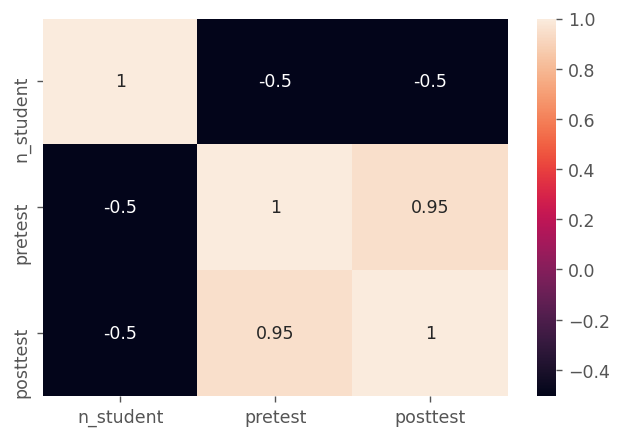

In [11]:
plt.figure(dpi=125)
sns.heatmap(data.corr(),annot = True)

## Step 3: Data Preparation

In [12]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

features = ['school', 'school_setting', 'school_type', 'classroom','teaching_method','lunch']
data[features] = encoder.fit_transform(data[features])

data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,0.0,2.0,0.0,22.0,1.0,20.0,2FHT3,Female,0.0,62.0,72.0
1,0.0,2.0,0.0,22.0,1.0,20.0,3JIVH,Female,0.0,66.0,79.0
2,0.0,2.0,0.0,22.0,1.0,20.0,3XOWE,Male,0.0,64.0,76.0
3,0.0,2.0,0.0,22.0,1.0,20.0,556O0,Female,0.0,61.0,77.0
4,0.0,2.0,0.0,22.0,1.0,20.0,74LOE,Male,0.0,64.0,76.0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['classroom', 'pretest']] = scaler.fit_transform(data[['classroom', 'pretest']])

In [14]:
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,0.0,2.0,0.0,-0.914885,1.0,20.0,2FHT3,Female,0.0,0.519477,72.0
1,0.0,2.0,0.0,-0.914885,1.0,20.0,3JIVH,Female,0.0,0.814464,79.0
2,0.0,2.0,0.0,-0.914885,1.0,20.0,3XOWE,Male,0.0,0.666971,76.0
3,0.0,2.0,0.0,-0.914885,1.0,20.0,556O0,Female,0.0,0.445730,77.0
4,0.0,2.0,0.0,-0.914885,1.0,20.0,74LOE,Male,0.0,0.666971,76.0


In [15]:
#create X and y
data.columns
features = ['school', 'school_setting', 'school_type', 'classroom','teaching_method','pretest','lunch']
X = data[features]
y = data['posttest']

In [16]:
print('Independent features shape : ',X.shape)
print('Dependent feature shape   :',y.shape)

Independent features shape :  (2133, 7)
Dependent feature shape   : (2133,)


In [17]:
X.head(10)

,school,school_setting,school_type,classroom,teaching_method,pretest,lunch
0,0.0,2.0,0.0,-0.914885,1.0,0.519477,0.0
1,0.0,2.0,0.0,-0.914885,1.0,0.814464,0.0
2,0.0,2.0,0.0,-0.914885,1.0,0.666971,0.0
3,0.0,2.0,0.0,-0.914885,1.0,0.445730,0.0
4,0.0,2.0,0.0,-0.914885,1.0,0.666971,0.0
5,0.0,2.0,0.0,-0.914885,1.0,0.814464,0.0
6,0.0,2.0,0.0,-0.914885,1.0,0.593224,0.0
7,0.0,2.0,0.0,-0.914885,1.0,0.593224,0.0
8,0.0,2.0,0.0,-0.914885,1.0,0.666971,0.0
9,0.0,2.0,0.0,-0.914885,1.0,0.445730,0.0


In [18]:
y.head(10)

0    72.0
1    79.0
2    76.0
3    77.0
4    76.0
5    74.0
6    75.0
7    72.0
8    77.0
9    72.0
Name: posttest, dtype: float64

#### Train-Test Split 

In [19]:
#splitting data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [20]:
print('Training Data Shape (X_train)   : ', X_train.shape)
print('Training labels Shape (y_train) : ', y_train.shape)
print('Testing Data shape (X_test)     : ', X_test.shape)
print('Testing labels shape (y_test)   : ', y_test.shape)

Training Data Shape (X_train)   :  (1493, 7)
Training labels Shape (y_train) :  (1493,)
Testing Data shape (X_test)     :  (640, 7)
Testing labels shape (y_test)   :  (640,)


## Step 4: Training the model

### Model Building Steps:

1. create the object of multiple linear regression

2. fit the model(i.e learns the coefficients)

3. see the parameters, make predictions on train or test set

4. evaluate the model

In [21]:
#1. create the object of linear regression
lr = LinearRegression()

#2. fit the model (i.e learns the coefficients)
lr.fit(X_train,y_train)

LinearRegression()

#### Looking at some key parameters

In [22]:
# coefficient
print('coefficient= ',lr.coef_ )

coefficient=  [-0.02814928 -0.23424516 -0.16349616  0.09783475 -5.94260504 12.57884026
 -0.94011802]


In [23]:
# intercept
print('intercept=',lr.intercept_)

intercept= 72.03970753210474


## Step 5: Predictions and Evaluation on the test set

#### Making Predictions

In [24]:
y_pred = lr.predict(X_test)

print(lr.predict(X_test[0:5]))

[63.50746712 60.72452178 45.04843507 70.17899726 42.17877629]


#### Evaluating the model

In [25]:
print('Training Set Score : ', lr.score(X_train, y_train))
print('Testng Set Score   : ', lr.score(X_test, y_test))

Training Set Score :  0.9467970784552421
Testng Set Score   :  0.9471958383556727


#### Mean Absolute error

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

2.569829030952075

#### Mean Squared Error

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

10.450585077469848

#### Root Mean Squared Error (RMSE)

In [28]:
#shows how close the observed data points are to the model's predicted values
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared = False)

3.232736468917602

#### R-squared Error-Coefficient of determination 

In [31]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)

r_p = r_score*100
print(r_p,"% of variance in 'posttest' is explained by 'features in X'")

94.71958383556726 % of variance in 'posttest' is explained by 'features in X'
